### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(ggplot2)

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
# Remove Gender and Birth Year column from ny & chi dataset
ny <- subset(ny, select = -c(Gender, Birth.Year))
chi <- subset(chi, select = -c(Gender, Birth.Year))

# Create an additional column for Cities
wash$City <- 'Washington'
ny$City <- 'New York'
chi$City <- 'Chicago'

# Combine all dataset into one
new_df <- rbind(ny, wash, chi)

In [7]:
# Create a new column for day of the week
new_df$weekday <- weekdays(as.Date(new_df$Start.Time), abbreviate=TRUE)
head(new_df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,weekday
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,New York,Sun
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,New York,Thu
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,New York,Wed
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,New York,Mon
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,New York,Wed
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,New York,Wed


### Question 1


What is the most common day of week?

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

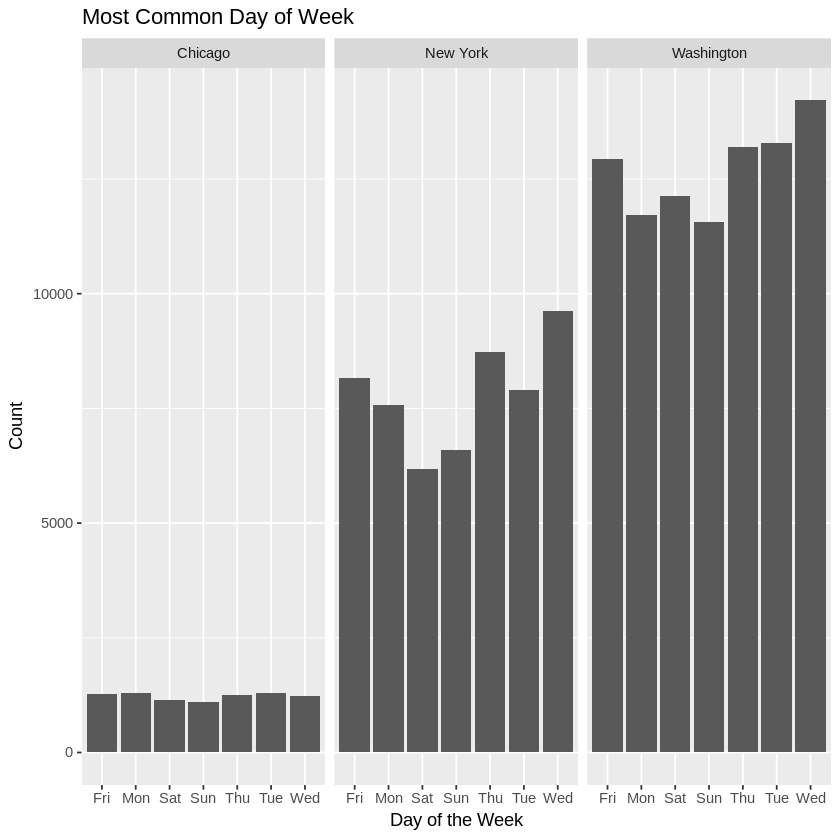

In [8]:
# Your solution code goes here
ggplot(data = subset(new_df, !is.na(weekday)), aes(x = weekday)) +
  geom_histogram(binwidth = 1, stat="count") +
  ggtitle('Most Common Day of Week') +
  labs(y = 'Count', x = 'Day of the Week') +
  facet_wrap(~City)

In [9]:
table(new_df$weekday)


  Fri   Mon   Sat   Sun   Thu   Tue   Wed 
22379 20593 19459 19274 23187 22478 25080 

**Summary of your question 1 results goes here.**

From the table summary we can see that Wednesday is the most common day of the week across all the cities and Sunday is the least common. Furthermore, we can see that the weekdays sees more activity compared to the weekends. Individually, both New York and Washington sees greater activity on Wednesday whilst Chicago is evenly distributed with slightly more activities during the weekdays.

### Question 2

What is the average travel time for users in different cities?

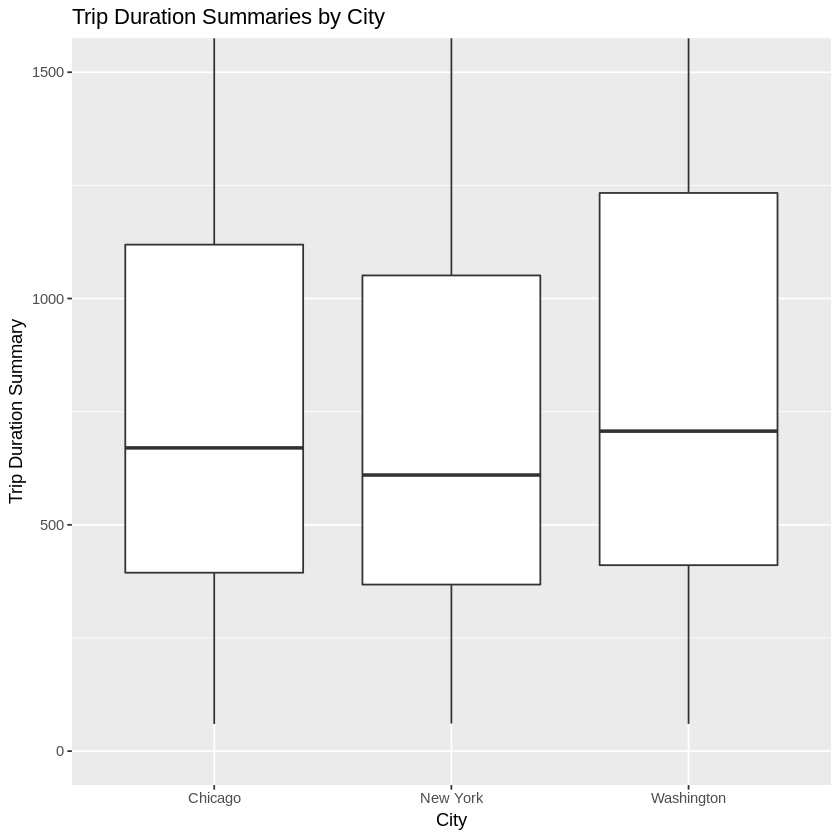

In [10]:
# Your solution code goes here
ggplot(data = subset(new_df, !is.na(Trip.Duration)), aes(x=City, y=Trip.Duration)) +
    geom_boxplot() +
    ggtitle('Trip Duration Summaries by City') +
    labs(y = 'Trip Duration Summary', x = 'City') +
    coord_cartesian(ylim=c(0,1500))

In [11]:
by(new_df$Trip.Duration, new_df$City, summary)

new_df$City: Chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 
------------------------------------------------------------ 
new_df$City: New York
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 
------------------------------------------------------------ 
new_df$City: Washington
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    60.3    410.9    707.0   1234.0   1233.2 904591.4        1 

**Summary of your question 2 results goes here.**

From the graph and summary table, we can see that average trip duration is higest in Washington and lowest in New York. This could be due to the greater number of users that are in Washington, however Chicago has the least number of user but the beat New York on average trip duration. This could be a result of the layout of each city, with New York being a lot smaller in area compared to Washington and Chicago.

### Question 3

What are the counts of each user type?

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

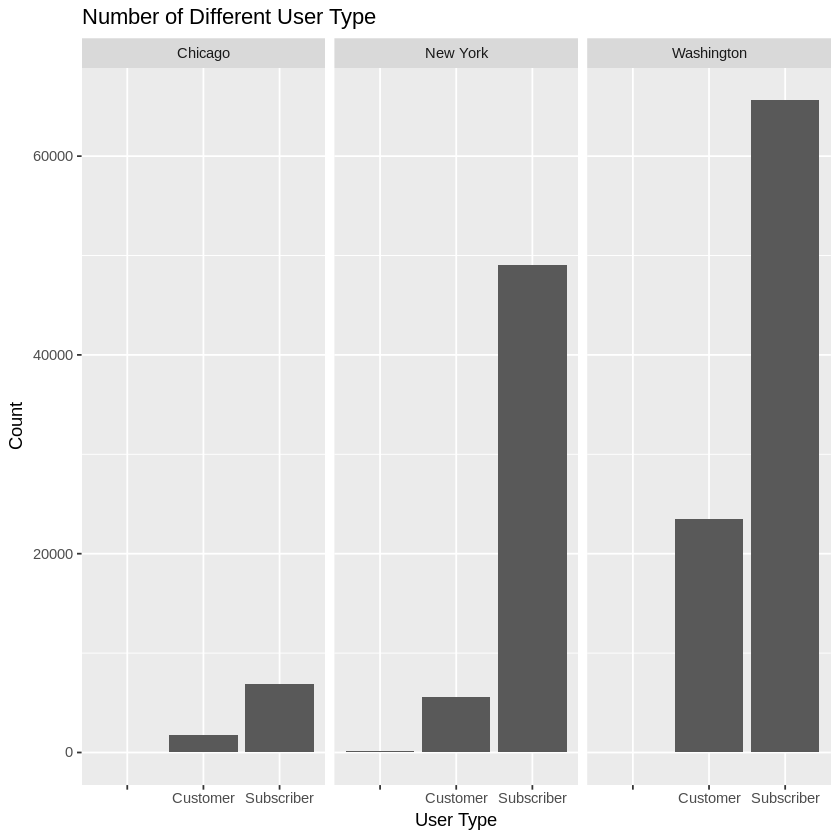

In [12]:
# Your solution code goes here
ggplot(data = subset(new_df, !is.na(User.Type)), aes(x = User.Type)) +
  geom_histogram(binwidth = 1, stat="count") +
  ggtitle('Number of Different User Type') +
  labs(y = 'Count', x = 'User Type') +
  facet_wrap(~City)

In [13]:
table(new_df$User.Type)


             Customer Subscriber 
       121      30754     121576 

**Summary of your question 3 results goes here.**

From the above graph and table all three cities user skew heavily towards being subscriber as opposed to customers. Individually, New York seem to have the greater subscriber to customer ratio. This may be due to the shorter average trip duration and higher traffic congestion in New York. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')